### Project Overview：

#### Introduction:


#### Model Architecture:
We have explored different state-of-the-art architectures for MNIST digit recognition and compared their performance. A recent extensive survey of MNIST-classification networks was done by Baldominos et al., 2019 (ref.)   Here, we implemented and compared three neural network architectures. Network denoted as CNN is a convolutional network with two convolutional layers with MaxPool layer and with ReLU activation function followed by a dense layer and softmax activation for the classification task. CNN_Drop is based on the CNN and adds a Dropout layer before the final softmax activation function. CNN with Batch Normalization layers is also based on the standard CNN architecture and adds two batch normalization layers before MaxPool functions.

#### Citation:

**CNN**: Baldominos, A., Sáez, Y., and Isasi, P. (2019). A Survey of Handwritten Character Recognition with MNIST and EMNIST. Appl. Sci. 2019, 3169.
 
**Batch Normalization**: Ioffe, S., and Szegedy, C. (2015). Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift. ArXiv150203167 Cs.

**Dropout**： Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., and Salakhutdinov, R. (2014). Dropout: A Simple Way to Prevent Neural Networks from Overfitting. J. Mach. Learn. Res. 15, 1929–1958.


This notebook only includes the core code used for the training, for other parts of the code, please check out the github folders below.
image processing&graphing utility functions: 
https://github.com/nub3Ar/EE475-Final-Project/tree/main/utils
web interface:
https://github.com/nub3Ar/EE475-Final-Project/blob/main/app.py
test images:
https://github.com/nub3Ar/EE475-Final-Project/tree/main/test%20images

#### Shortcomings and Future Work


In [14]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from image_processor import transformation
from classifier.models import CNN
from classifier.Main import CNN_prediction
from utils.util_function import show_images, plot_losses, plot_accuracy, process_data

#### Load data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, y_train, x_test, y_test = process_data(x_train, y_train, x_test, y_test)

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train_), (x_test, y_test_) = keras.datasets.mnist.load_data()


In [4]:
INPUT_SHAPE = (28,28,1)
NUM_CLASSES = 10

class CNN(keras.Model):

    def __init__(self):
        super(CNN, self).__init__()
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='Same', activation='relu',
                                      input_shape = INPUT_SHAPE) )
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
        self.model.add(keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=1,padding='same', activation='relu'))
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'))
        self.model.add(keras.layers.Flatten())
        self.model.add(keras.layers.Dense(units=NUM_CLASSES, activation='sigmoid'))

    def call(self, inputs):
        return self.model(inputs)

class CNN_Drop(keras.Model):

    def __init__(self):
        super(CNN_Drop, self).__init__()
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='Same', activation='relu',
                                      input_shape = INPUT_SHAPE) )
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
        self.model.add(keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=1,padding='same', activation='relu'))
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'))
        self.model.add(keras.layers.Flatten())
        self.model.add(keras.layers.Dropout(0.5))
        self.model.add(keras.layers.Dense(units=NUM_CLASSES, activation='sigmoid'))

    def call(self, inputs):
        return self.model(inputs)

class CNN_BN(keras.Model):

    def __init__(self):
        super(CNN_BN, self).__init__()
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='Same', input_shape = INPUT_SHAPE) )
        self.model.add(keras.layers.BatchNormalization())
        self.model.add(keras.layers.ReLU())
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
        
        self.model.add(keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=1,padding='same'))
        self.model.add(keras.layers.BatchNormalization())
        self.model.add(keras.layers.ReLU())
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'))
        
        self.model.add(keras.layers.Flatten())
        self.model.add(keras.layers.Dense(units=NUM_CLASSES, activation='sigmoid'))

    def call(self, inputs):
        return self.model(inputs)


#### Training

In [15]:
epochs = 20
batch_size = 128

# regular CNN
cnn = CNN()
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

CNN_history = cnn.fit(x_train[:3000], y_train[:3000], batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
score = cnn.evaluate(x_test, y_test, verbose=0)
print("CNN \n", "Test loss:", score[0], "\n Test accuracy:", score[1])
cnn.save_weights("ckpt_CNN")

# CNN with dropout
cnn_drop = CNN_Drop()
cnn_drop.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

CNN_drop_history = cnn_drop.fit(x_train[:3000], y_train[:3000], batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
score = cnn_drop.evaluate(x_test, y_test, verbose=0)
print("CNN with Dropout \n","Test loss:", score[0], "\n Test accuracy:", score[1])
cnn_drop.save_weights("ckpt_CNN_Drop")

# CNN with batch normalization
cnn_bn = CNN_BN()
cnn_bn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

CNN_BN_history = cnn_bn.fit(x_train[:3000], y_train[:3000], batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
score = cnn_bn.evaluate(x_test, y_test, verbose=0)
print("CNN with BN \n", "Test loss:", score[0], "\n Test accuracy:", score[1])
cnn_bn.save_weights("ckpt_CNN_BN")

CNN 
 Test loss: 0.13956642150878906 
 Test accuracy: 0.958299994468689
CNN with Dropout 
 Test loss: 0.1133539155125618 
 Test accuracy: 0.9635000228881836
CNN with BN 
 Test loss: 0.22483141720294952 
 Test accuracy: 0.9473999738693237


#### Results

Plot

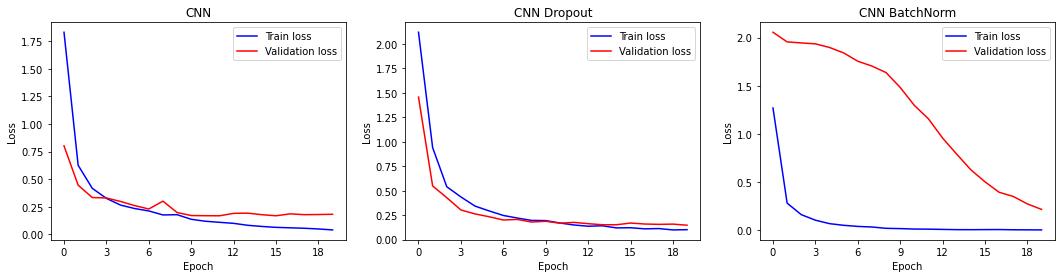

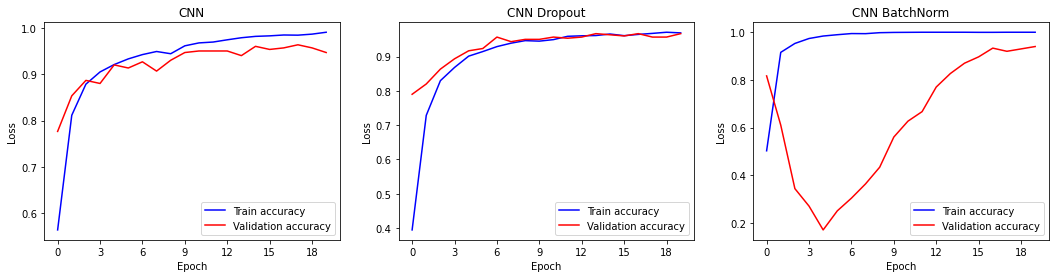

In [16]:
plot_losses([CNN_history, CNN_drop_history, CNN_BN_history ], ['CNN', 'CNN Dropout', 'CNN BatchNorm'])
plot_accuracy([CNN_history, CNN_drop_history, CNN_BN_history], ['CNN', 'CNN Dropout', 'CNN BatchNorm'])